# Credit Card Fraud Detection

## Context
Credit Card Fraud Detection model tailored for the Indian market, aiming to enhance cybersecurity
and minimize financial losses due to fraudulent activities in the digital payment sector.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

### Load and Read Dataset

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, dataset cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 568630 Rows and 31 columns


In [5]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().round(2)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,...,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.0
mean,284314.50,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,12041.96,0.5
std,164149.49,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.5
min,0.00,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,...,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01,0.0
25%,142157.25,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,...,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89,0.0
50%,284314.50,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,...,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15,0.5
75%,426471.75,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,...,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33,1.0
max,568629.00,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,...,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93,1.0


## Exploratory Data Analysis (EDA)

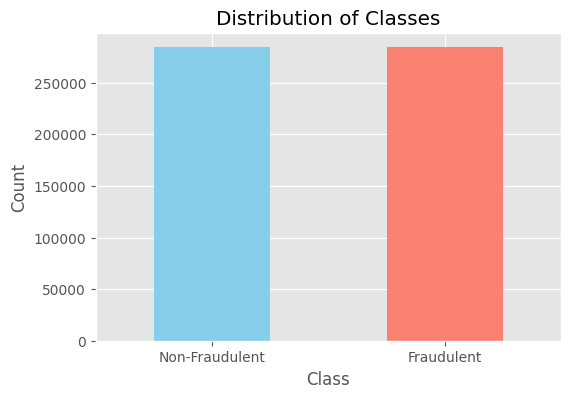

In [7]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


### Time Series of Fradulent Transaction
-it calculates the frequency of fraudulent transactions over time.

- observed spikes in fraudulent transactions during  time period(65000,95000), which could indicate periods of increased fraudulent activity.


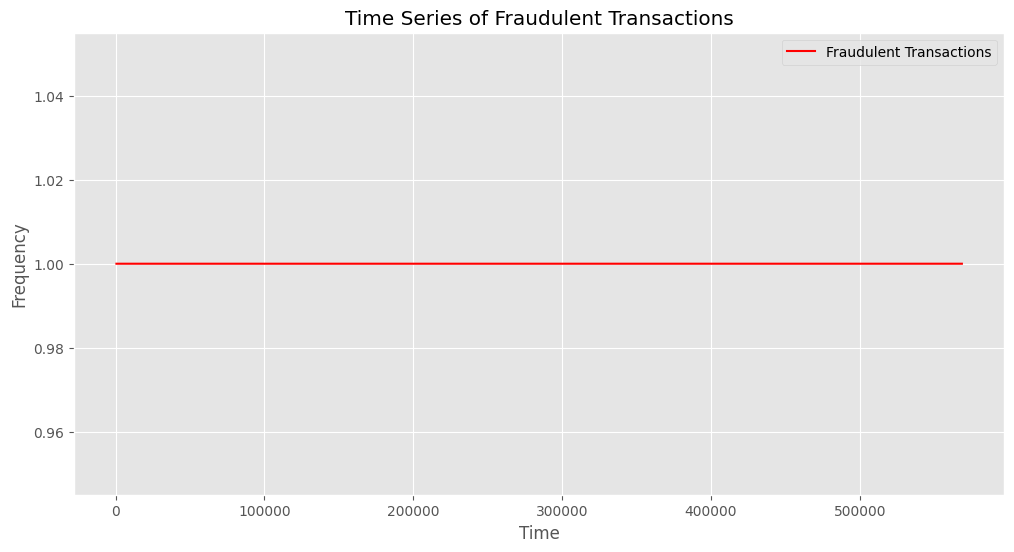

In [9]:
# If 'Time' column is missing, create a dummy 'Time' column for demonstration
if 'Time' not in df.columns:
	df['Time'] = np.arange(len(df))  # Creating a dummy 'Time' column as a sequence of numbers

# Grouping the data by 'Time' and 'Class' and calculating the frequency of fraudulent transactions
fraudulent_transactions = df[df['Class'] == 1].groupby('Time').size()

# Plotting the time series of fraudulent transactions
plt.figure(figsize=(12, 6))
plt.plot(fraudulent_transactions.index, fraudulent_transactions.values, label='Fraudulent Transactions', color='red')
plt.title('Time Series of Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()

### Heatmap of Average Transaction Amounts over Time Intervals

Text(120.7222222222222, 0.5, 'Amount')

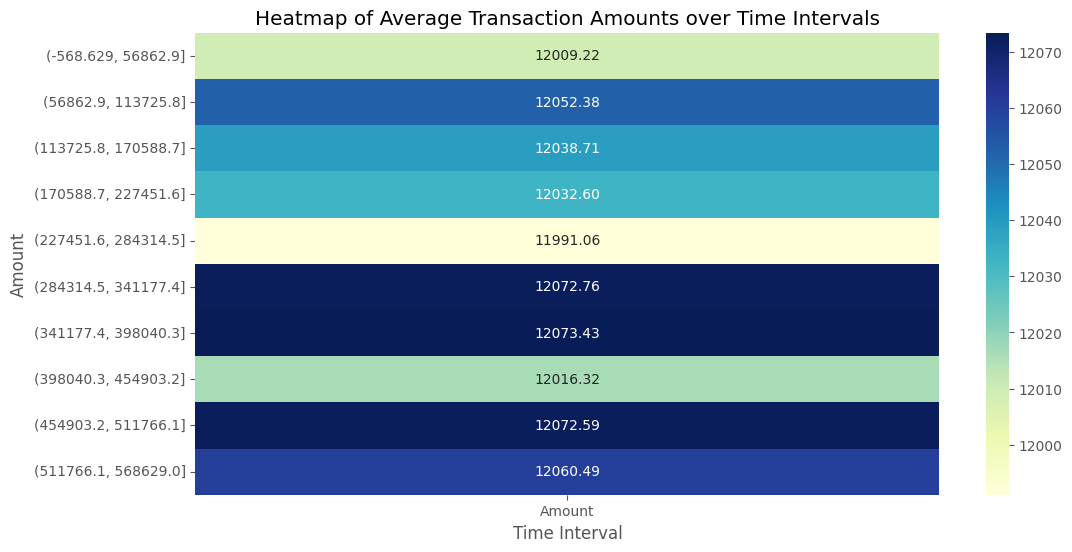

In [10]:
df['Time_Interval'] = pd.cut(df['Time'], bins=10)  # Adjust the number of bins as needed

# Creating a pivot table to aggregate 'Amount' values for each time interval
pivot_table = df.pivot_table(values='Amount', index='Time_Interval', aggfunc=np.mean)

# Creating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Average Transaction Amounts over Time Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Amount')

### Kernel Density Estimation of Transaction Amounts
We use a KDE plot to visualize the distribution of transaction amounts for fraudulent and non-fraudulent transactions.
we might see that fraudulent transactions tend to have higher or lower amounts compared to non-fraudulent transactions.

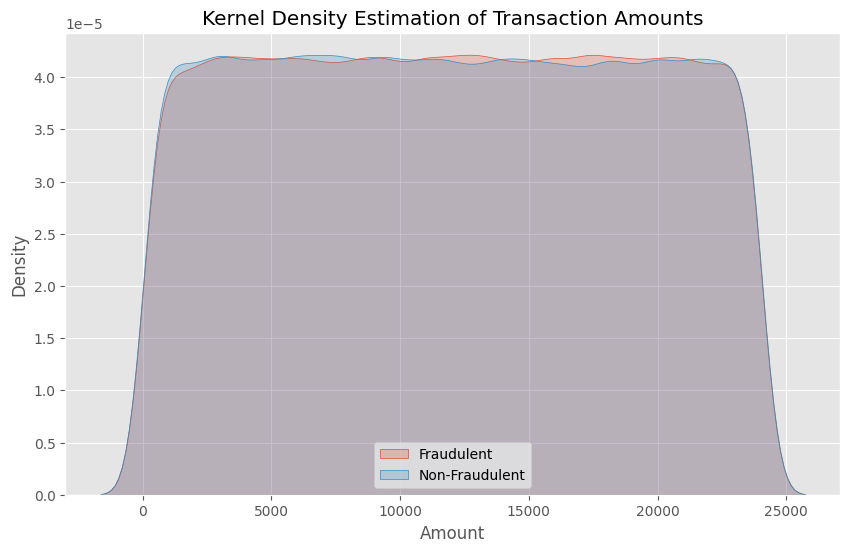

In [11]:
# Creating a KDE plot for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraudulent', shade=True)

# Creating a KDE plot for non-fraudulent transactions
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraudulent', shade=True)

# Adding labels and title
plt.title('Kernel Density Estimation of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()

### Histogram of Transaction Amounts

Text(0, 0.5, 'Frequency')

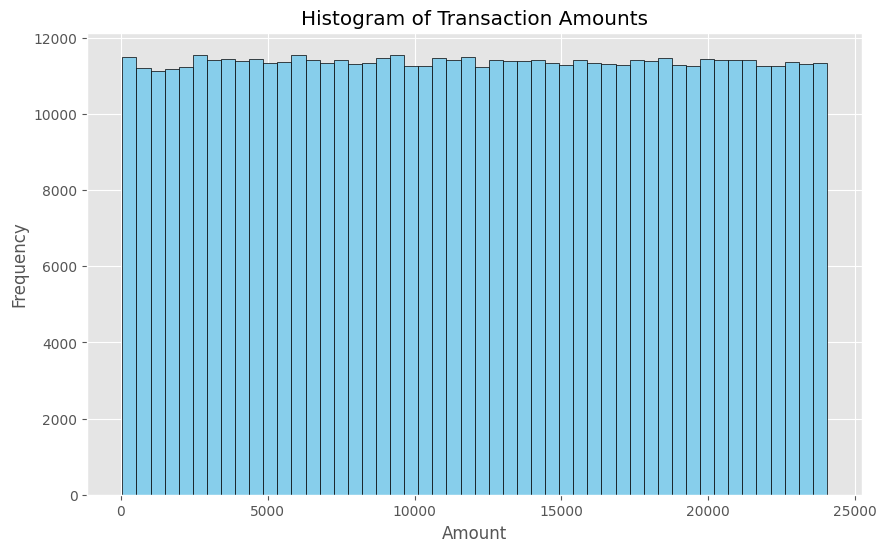

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

The total amount of fraudulent transactions:  3428157045.350016
The total number of fraudulent transactions:  284315
The total amount of non-fraudulent transactions:  3419261324.4000373
The total number of fraudulent transactions:  284315


(np.float64(-1.1049999894114075),
 np.float64(1.204999778326156),
 np.float64(-1.1002142560964032),
 np.float64(1.1000102026712573))

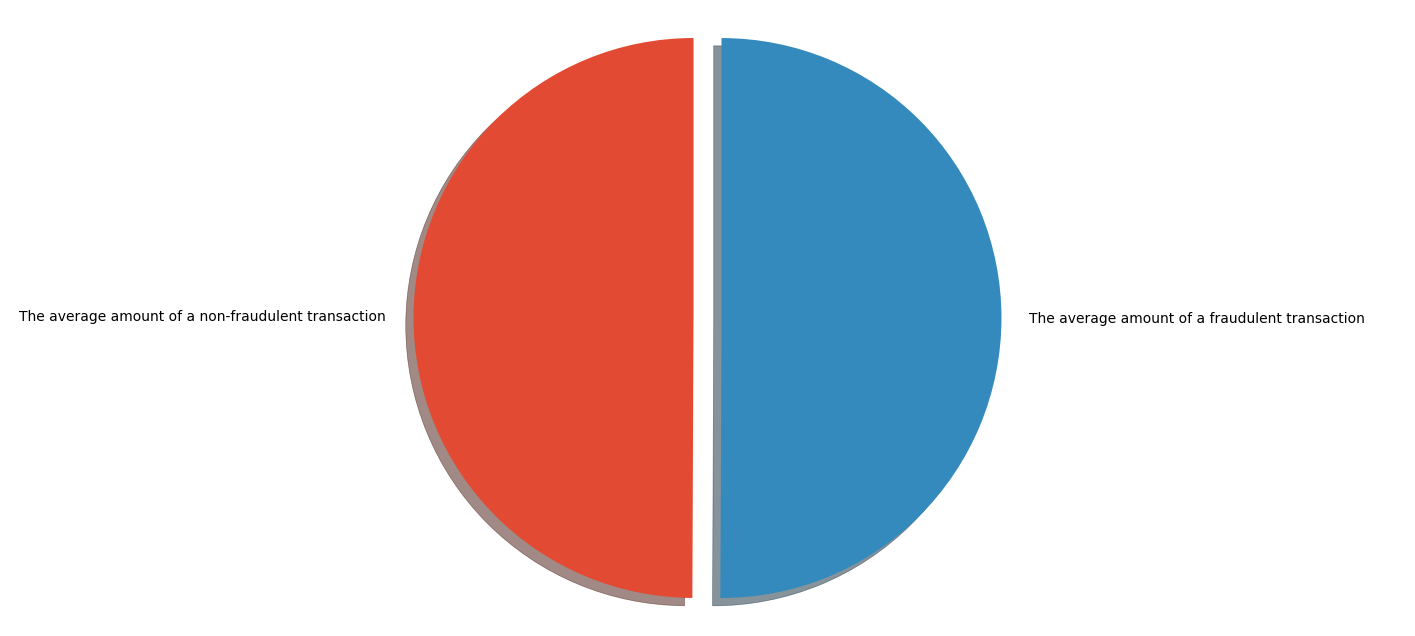

In [13]:
fraudulent_amount = 0
number_of_fraudulent_transactions = 0
for record in df.itertuples():
    if record.Class == True:
        fraudulent_amount += record.Amount
        number_of_fraudulent_transactions += 1
print('The total amount of fraudulent transactions: ', fraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_fraudulent_transactions)  
fraudulent_mean = fraudulent_amount / number_of_fraudulent_transactions
        
nonfraudulent_amount = 0
number_of_nonfraudulent_transactions = 0
for record in df.itertuples():
    if record.Class == False:
        nonfraudulent_amount += record.Amount
        number_of_nonfraudulent_transactions += 1
print('The total amount of non-fraudulent transactions: ', nonfraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_nonfraudulent_transactions)  
nonfraudulent_mean = nonfraudulent_amount / number_of_nonfraudulent_transactions
        
d = {'Class':[0, 1], 'Mean':[nonfraudulent_mean, fraudulent_mean]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The average amount of a non-fraudulent transaction', 'The average amount of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Depict how the frequency of fraudulent transactions (orange) is distributed in time, compared to that of the non-fraudulents (blue).

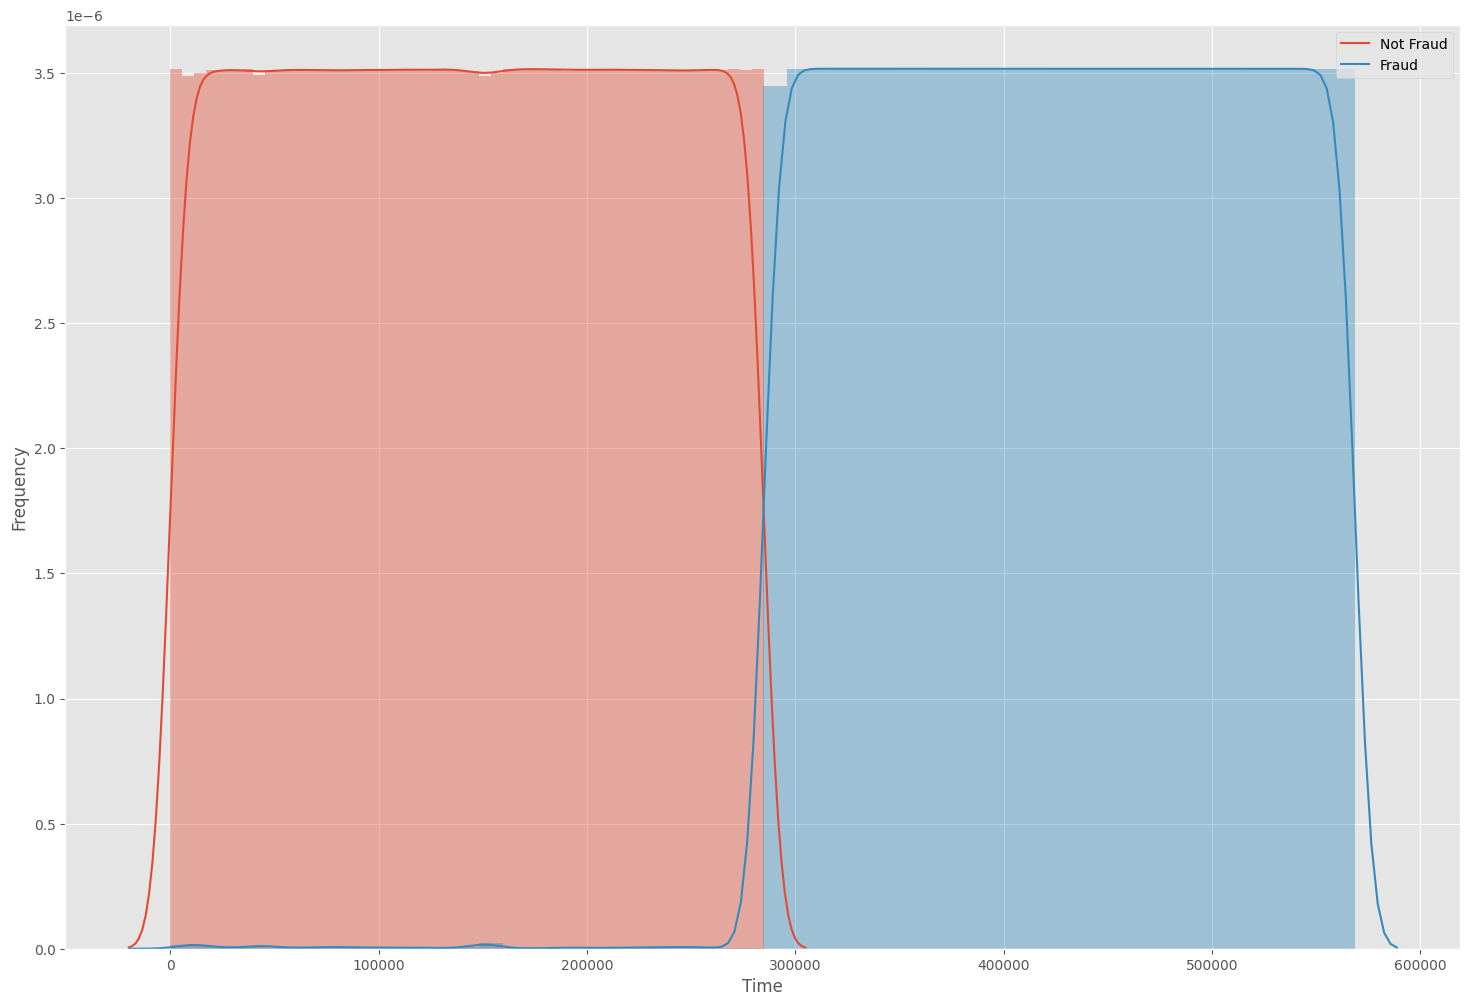

In [14]:
fraudulent_transactions = df[df['Class'] == 1]
nonfraudulent_transactions = df[df['Class'] == 0]

plt.figure(figsize=(18,12))

sns.distplot(a=nonfraudulent_transactions["Time"], kde=True)
plot = sns.distplot(a=fraudulent_transactions["Time"], kde=True)

plot.set(xlabel ='Time', ylabel ='Frequency')
plot.legend(['Not Fraud', 'Fraud'])

In [15]:
df["Amount"].sort_values(ascending=False).head(10)

473871    24039.93
85369     24039.93
15509     24039.88
182117    24039.85
376626    24039.82
515776    24039.76
436922    24039.61
137650    24039.55
32125     24039.55
241276    24039.53
Name: Amount, dtype: float64

## Model Implementation

### Import Relevant Scikit-Learn Libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### (Model Implementation Phase-I)

In [18]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Class")
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (426472, 32)
X Test  :  (142158, 32)
Y Train :  (426472,)
Y Test  :  (142158,)


In [19]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
SVC = SVC()

### Feature Selection (Model Implementation Phase-II) (For Web App Model)
Selecting most important features which have percentile more than or equal to 50.

In [20]:
F_50 = SelectPercentile( percentile= 50)

In [21]:
# Convert Interval columns to numeric codes
for col in X.columns:
	if X[col].apply(lambda x: isinstance(x, pd.Interval)).any():
		X[col] = X[col].astype('category').cat.codes

set_X = F_50.fit_transform(X, y)

In [22]:
new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
new_x

,id,V1,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,Time,Time_Interval
0,0.0,-0.260648,-0.469648,2.496266,-0.083724,0.732898,0.519014,0.727159,0.637735,-0.987020,0.293438,0.549020,0.215598,0.512307,0.0,0.0
1,1.0,0.985100,-0.356045,0.558056,-0.429654,0.428605,0.406466,0.347452,0.529808,0.140107,1.564246,0.627719,0.789188,0.403810,1.0,0.0
2,2.0,-0.260272,-0.949385,1.728538,-0.457986,1.419481,0.743511,-0.261297,0.690708,-0.272985,0.659201,0.616874,-0.577514,0.886526,2.0,0.0
3,3.0,-0.152152,-0.508959,1.746840,-1.090178,1.143312,0.518269,-0.205698,0.575231,-0.752581,0.737483,0.559535,-0.030669,0.242629,3.0,0.0
4,4.0,-0.206820,-0.165280,1.527053,-0.448293,0.530549,0.658849,1.049921,0.968046,-1.203171,1.029577,0.241454,0.224538,0.366466,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625.0,-0.833437,0.061886,-0.899794,0.904227,0.481454,-0.370393,-0.938153,-1.161847,1.430971,-1.330500,-1.363454,-1.480796,-1.520928,568625.0,9.0
568626,568626.0,-0.670459,-0.202896,-0.068129,-0.267328,0.237148,-0.016935,0.483894,-0.210817,0.173590,-0.539948,-0.812043,-0.545184,-0.575991,568626.0,9.0
568627,568627.0,-0.311997,-0.004095,0.137526,-0.035893,0.121098,-0.070958,-0.122048,-0.144495,0.477582,-0.461849,-0.395126,-0.370201,-0.729002,568627.0,9.0
568628,568628.0,0.636871,-0.516970,-0.300889,-0.144480,-0.294148,0.580568,0.893527,-0.080078,-0.324934,0.335215,-0.390369,0.477402,0.848443,568628.0,9.0


<Axes: >

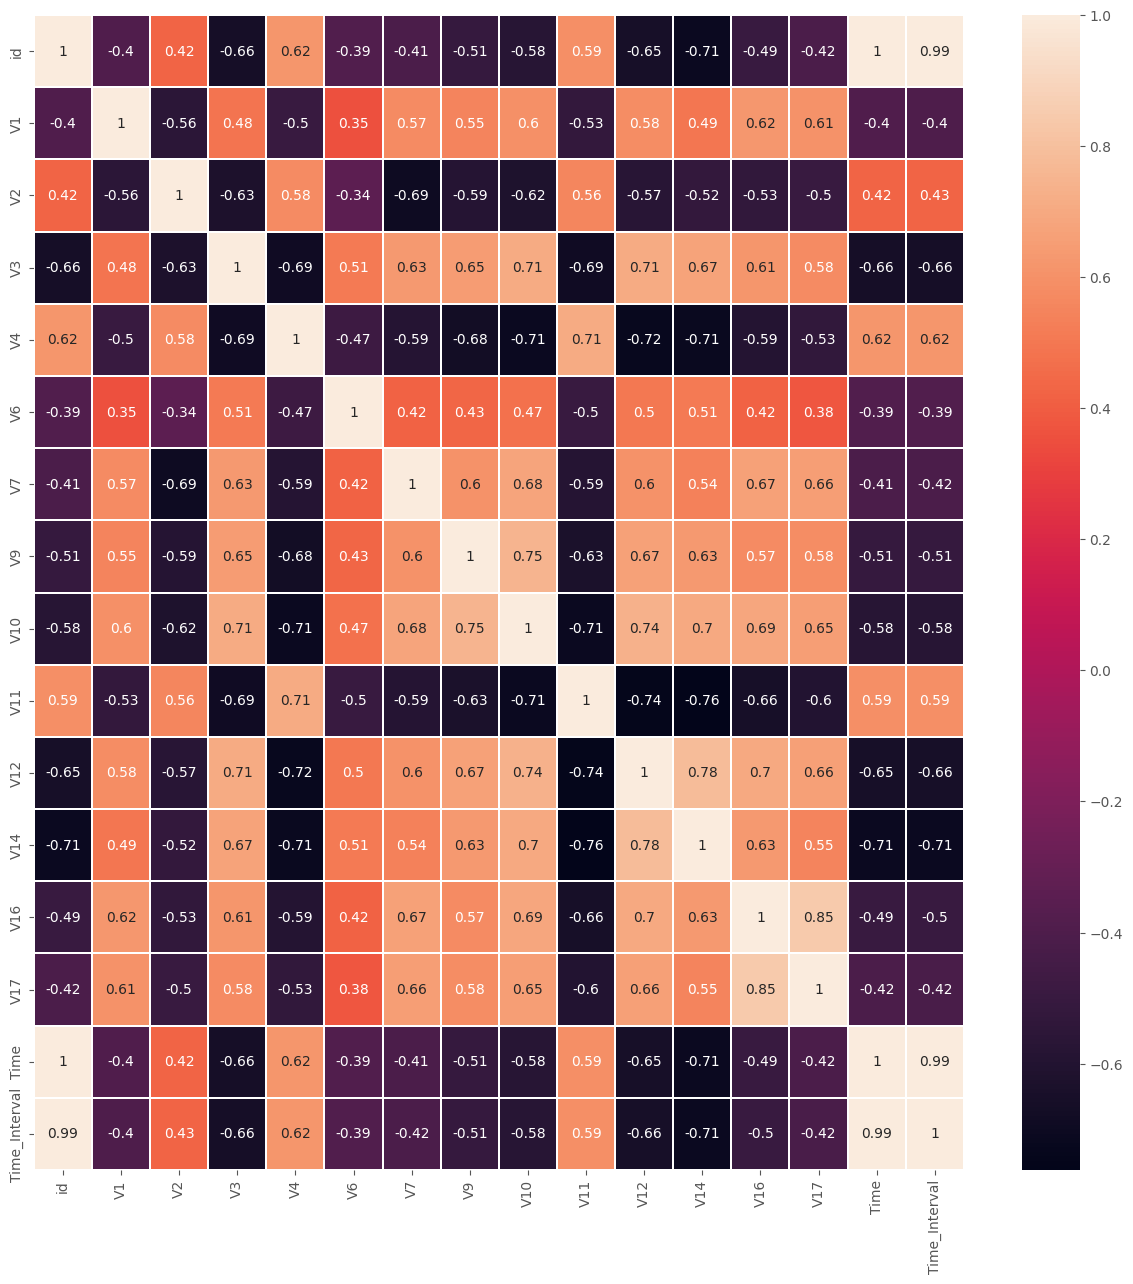

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(new_x.corr(),annot=True,linecolor='white',linewidths=0.2)

### Handling Imbalanced Dataset (Model Implementation Phase-III)

In [24]:
undersample = RandomUnderSampler()

In [25]:
X_smote,y_smote = undersample.fit_resample(X_train,y_train)

Class
0    284315
1    284315
Name: count, dtype: int64


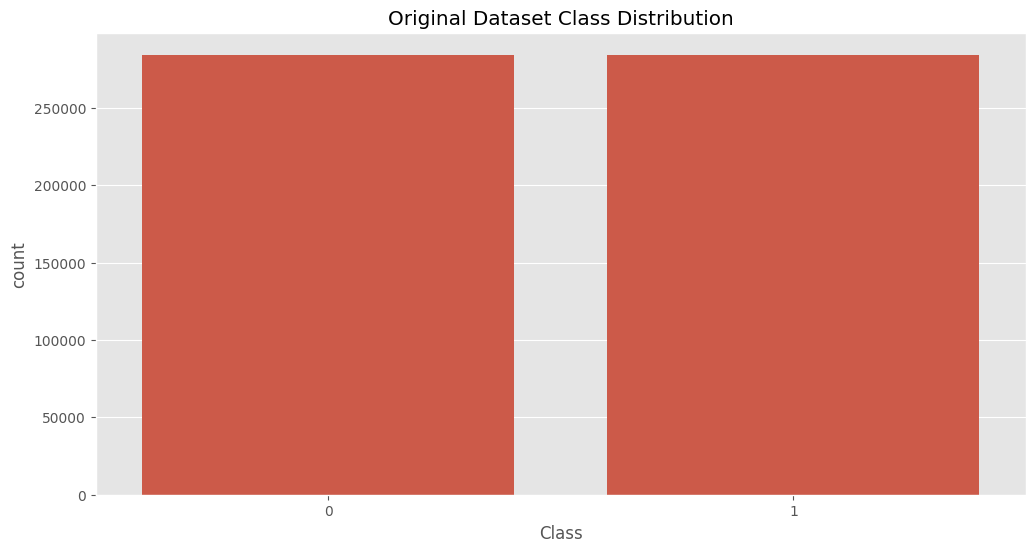

In [26]:
# Ensure the 'Class' column exists in the DataFrame
if 'Class' in df.columns:
	plt.figure(figsize=(12,6))
	plt.title('Original Dataset Class Distribution')
	sns.countplot(data=df, x='Class')
	print(df['Class'].value_counts())
else:
	print("Error: 'Class' column not found in the DataFrame.")

Class
0    213180
1    213180
Name: count, dtype: int64

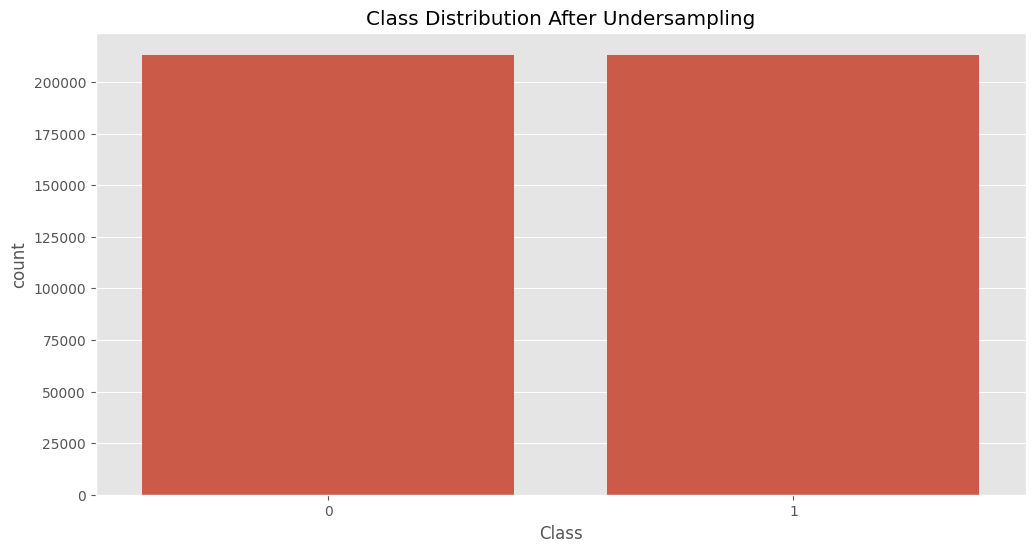

In [27]:
plt.figure(figsize=(12,6))
plt.title('Class Distribution After Undersampling')
sns.countplot(data=df,x=y_smote)
y_smote.value_counts()

<Axes: title={'center': 'Correlation After Undersampling'}>

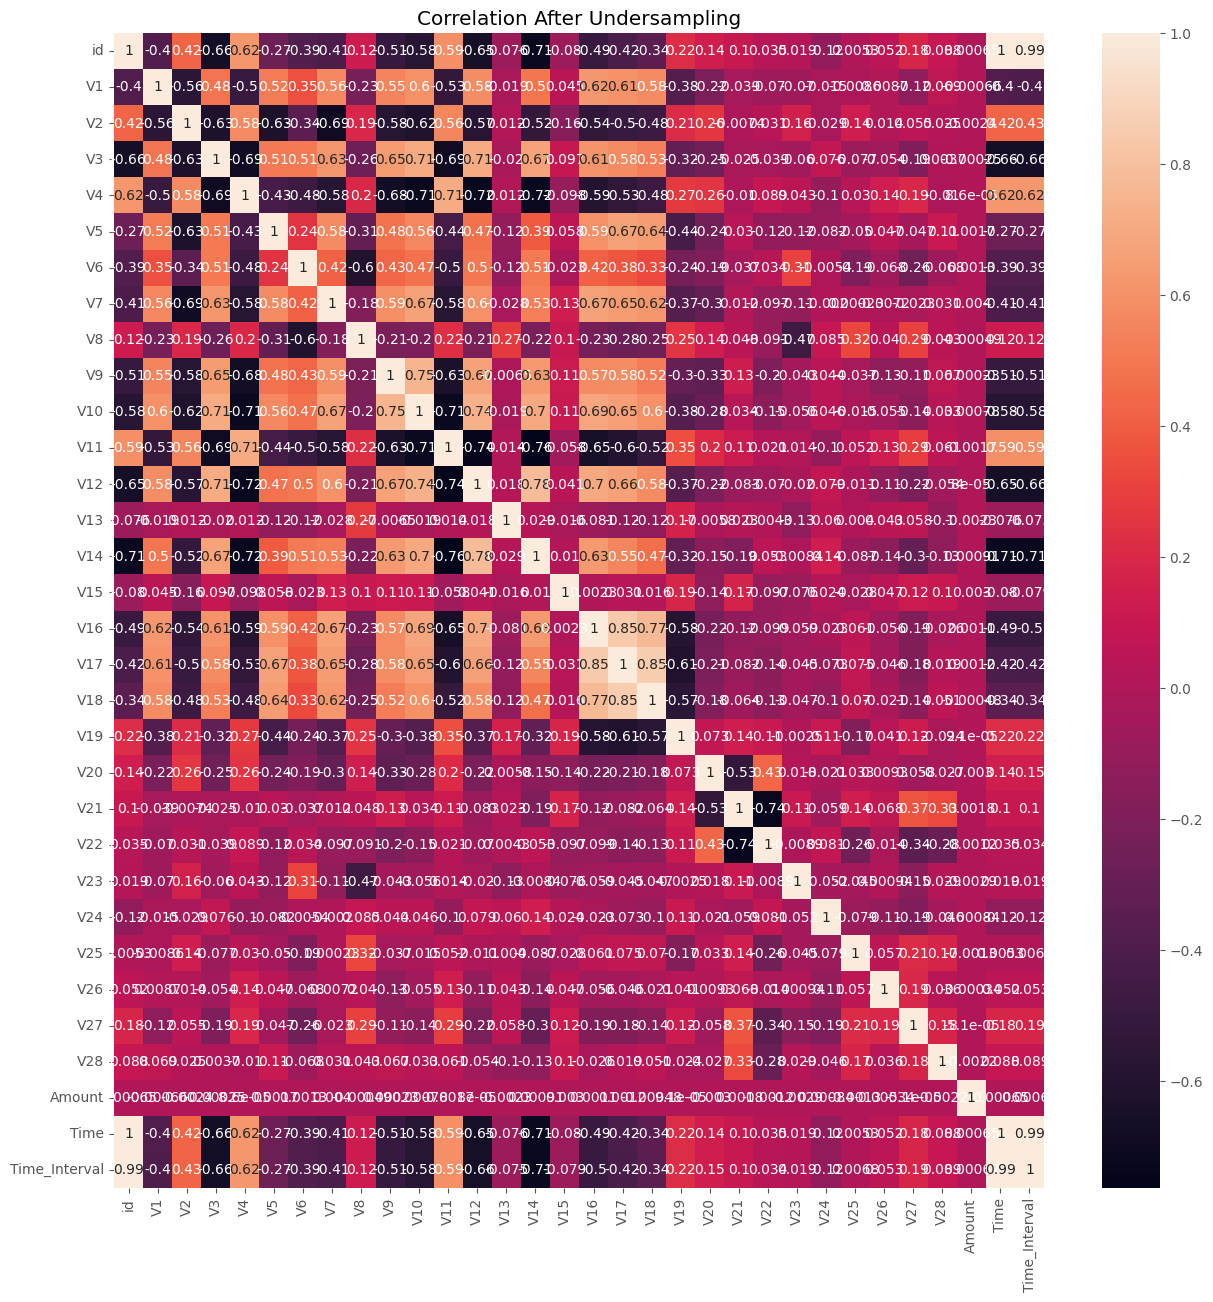

In [29]:
# Convert Interval columns to numeric codes
for col in X_smote.columns:
	if X_smote[col].apply(lambda x: isinstance(x, pd.Interval)).any():
		X_smote[col] = X_smote[col].apply(lambda x: x.mid)

plt.figure(figsize=(15,15))
plt.title('Correlation After Undersampling')
sns.heatmap(X_smote.corr(), annot=True)

### Splitting and Training Dataset Based on Sampled Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (319770, 32)
X Test  :  (106590, 32)
Y Train :  (319770,)
Y Test  :  (106590,)


In [31]:
# Convert Interval columns to numeric codes
for df in [X_train, X_test]:
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, pd.Interval)).any():
            df[col] = df[col].astype('category').cat.codes

# Model training and evaluation
li = [LR, DTC, RFC]

for i in li:
    i.fit(X_train, y_train)
    ypred = i.predict(X_test)
    print(i, ":", classification_report(y_test, ypred))
    print("********************************************")


LogisticRegression() :               precision    recall  f1-score   support

           0       0.99      0.99      0.99     53230
           1       0.99      0.99      0.99     53360

    accuracy                           0.99    106590
   macro avg       0.99      0.99      0.99    106590
weighted avg       0.99      0.99      0.99    106590

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53230
           1       1.00      1.00      1.00     53360

    accuracy                           1.00    106590
   macro avg       1.00      1.00      1.00    106590
weighted avg       1.00      1.00      1.00    106590

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53230
           1       1.00      1.00      1.00     53360

    accuracy   

[Text(0, 0.5, ''), Text(0, 1.5, '')]

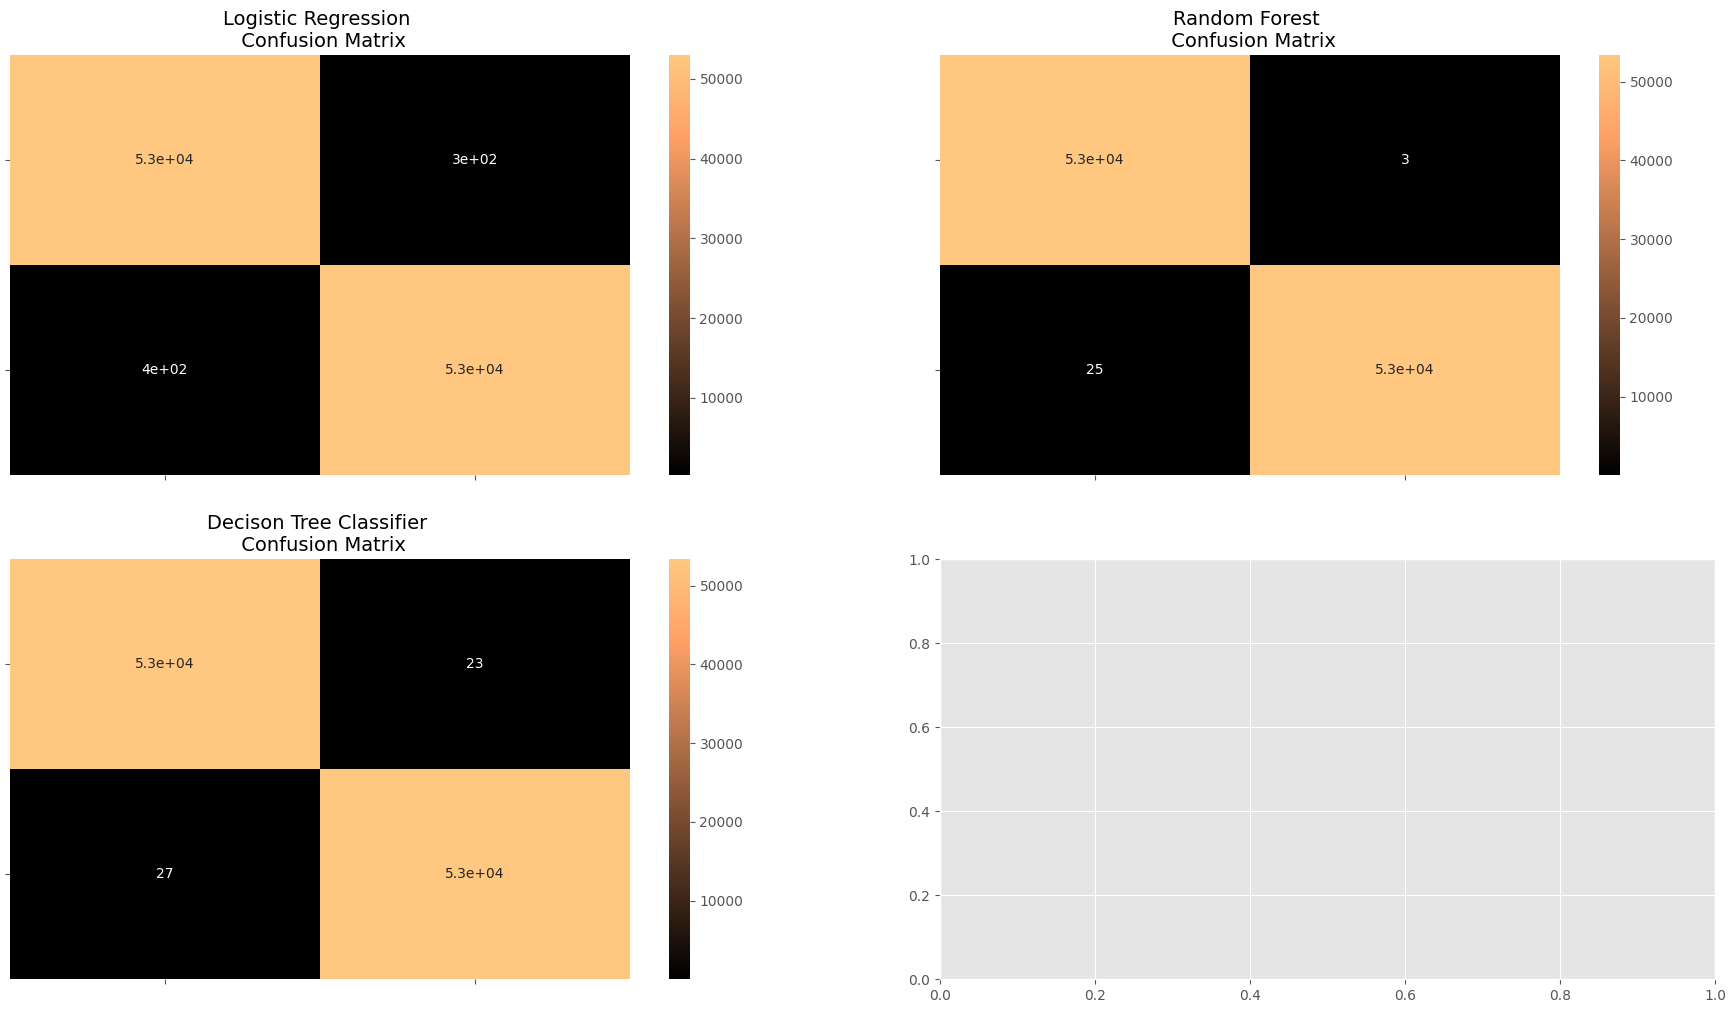

In [32]:
y_pred_log_reg = LR.predict(X_test)
y_pred_rfc = RFC.predict(X_test)
y_pred_tree = DTC.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
rfc_cf = confusion_matrix(y_test, y_pred_rfc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rfc_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Decison Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

## Save Final Model

In [33]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(RFC,pickle_out)
pickle_out.close()

In [36]:
# Ensure the input has the same number of features as the training data
input_data = pd.DataFrame([[2.052962, 0.101032, -2.061370, 0.139861, 0.708547, -0.992524, 0.637264, -0.076496, 0.209847, 1.073517, 0.963732, 0.977340, -0.378598, -0.584165, 0.036628]],
						  columns=X_train.columns[:15])  # Adjust columns to match the training data

# Fill missing columns with zeros to match the 32 features
for col in X_train.columns:
	if col not in input_data.columns:
		input_data[col] = 0

# Reorder columns to match the training data
input_data = input_data[X_train.columns]

# Make the prediction
RFC.predict(input_data)

array([0])

In [37]:
y_test

108468    0
189563    0
567052    1
338489    1
219152    0
         ..
304547    1
85849     0
465350    1
455173    1
71011     0
Name: Class, Length: 106590, dtype: int64

In [3]:
import pickle

with open("classifier.pkl", "rb") as f:
    model = pickle.load(f)

print(model.feature_names_in_)

['id' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount' 'Time' 'Time_Interval']
